In [ ]:
import gzip
import shutil
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
gz_path = Path("/content/drive/MyDrive/ML-Quiz-3DMedImg/test/quiz_037_0000.nii.gz")
nii_path = gz_path.with_suffix("")

if not nii_path.exists():
    with gzip.open(gz_path, 'rb') as f_in:
        with open(nii_path, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
    print(f"Unzipped to: {nii_path}")
else:
    print(f"Already unzipped: {nii_path}")

Unzipped to: /content/drive/MyDrive/ML-Quiz-3DMedImg/test/quiz_037_0000.nii


In [ ]:
img = nib.load(str(nii_path))
data = img.get_fdata()
print(f"Shape: {data.shape}")


Shape: (207, 135, 71)


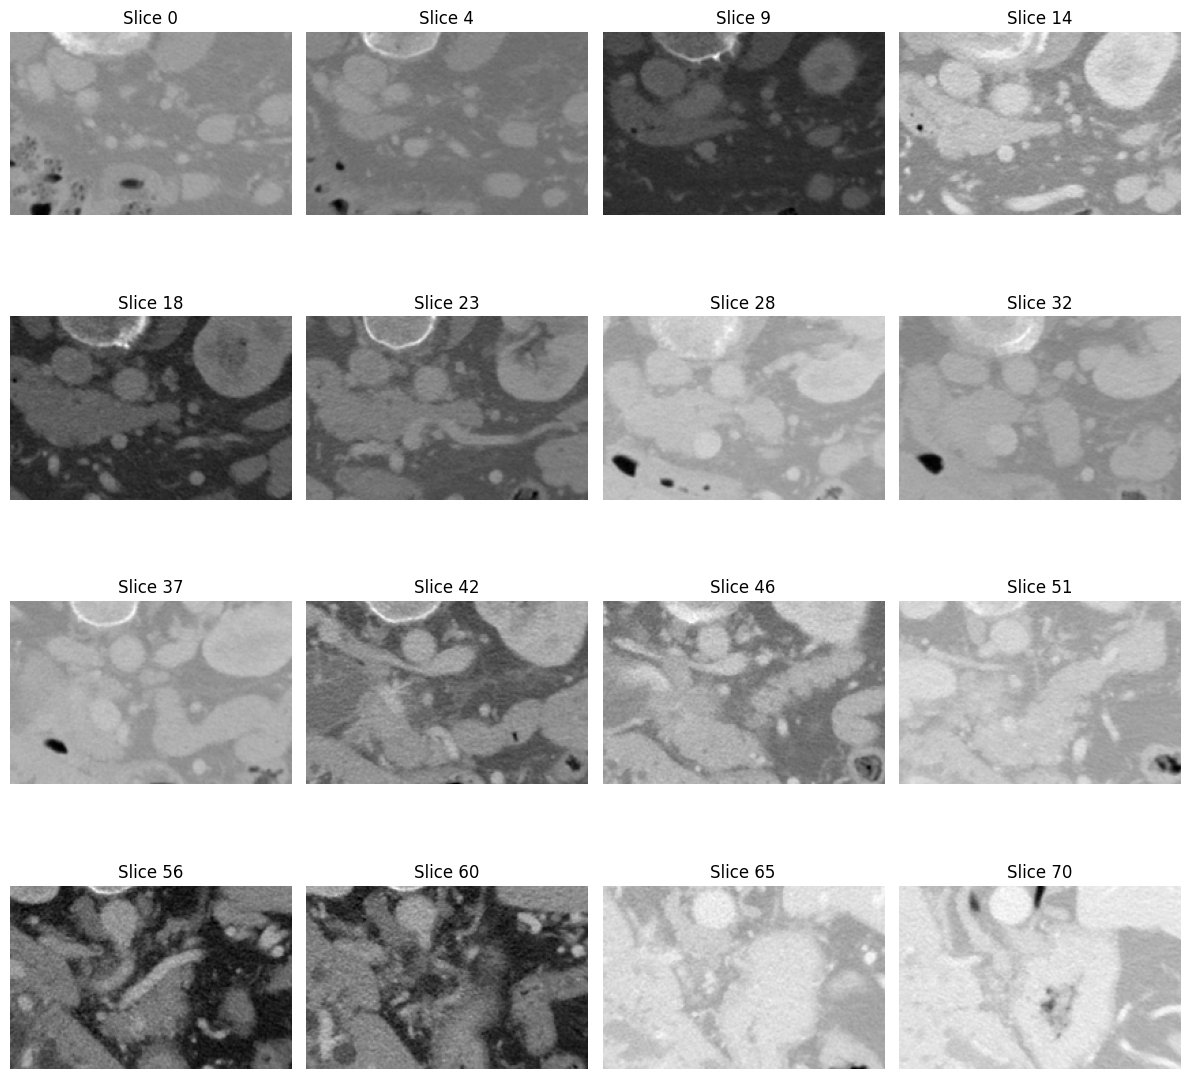

In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Choose 16 slices evenly across the z-axis
num_slices = 16
z_slices = np.linspace(0, data.shape[2] - 1, num_slices, dtype=int)

for i, ax in enumerate(axes.reshape(-1)):
    slice_idx = z_slices[i]
    ax.imshow(np.rot90(data[:, :, slice_idx]), cmap='gray')
    ax.set_title(f"Slice {slice_idx}")
    ax.axis("off")

plt.tight_layout()
plt.show()